<a href="https://colab.research.google.com/github/msgastli/power-anomaly-detection/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Mounting Drive and Preparing Environment

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Loading and Preprocessing Data

In [ ]:
work_dir = 'drive/MyDrive/power-anomaly-detection/'
df = pd.read_csv(work_dir + 'household_power_consumption.txt', sep=";")
df

<ipython-input-5-bfdd64e26351>:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(work_dir + 'household_power_consumption.txt', sep=";")


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [ ]:
df.insert(0, 'Datetime', pd.to_datetime(df['Date']+' '+df['Time'], dayfirst=True))
df.drop(columns=['Date','Time'], inplace=True)
cols = df.columns.values
#df.set_index('Datetime', inplace=True)
df.replace(to_replace='?', value=np.nan)
df.dropna(inplace=True)
df[cols[1:]] = df[cols[1:]].apply(pd.to_numeric)
df

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...
2075254,2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26 21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 140.7 MB


<Axes: xlabel='Datetime'>

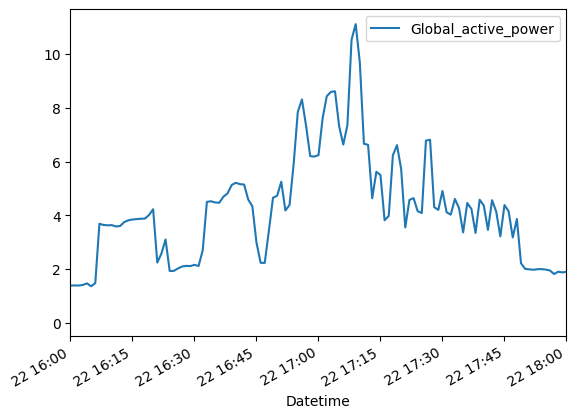

In [ ]:
#start_point = pd.Timestamp('2009-01-01 00:00:00')
#df.truncate(before=start_point)
df.info()
column = 'Global_active_power'
xlim_start = pd.Timestamp('2009-02-22 16:00:00')
xlim_end = pd.Timestamp('2009-02-22 18:00:00')
df.plot(x='Datetime', y=column, xlim=(xlim_start, xlim_end))

##Statistical Methods

###Z-Score

In [ ]:
column = 'Global_active_power'
df['Z-Score'] = np.abs((df[column] - df[column].mean()) / df[column].std())
df['Z-Score'] = df['Z-Score'] > 2
outliers_z = df[df['Z-Score'] == True][['Datetime', column]]
outliers_z_percent = (len(outliers_z) / len(df)) * 100
print(f"Detected {len(df['Z-Score'])} outliers ({outliers_z_percent:.2f}% of the dataset) in the {column} column using z-scores.\n")

Detected 2049280 outliers (5.22% of the dataset) in the Global_active_power column using z-scores.



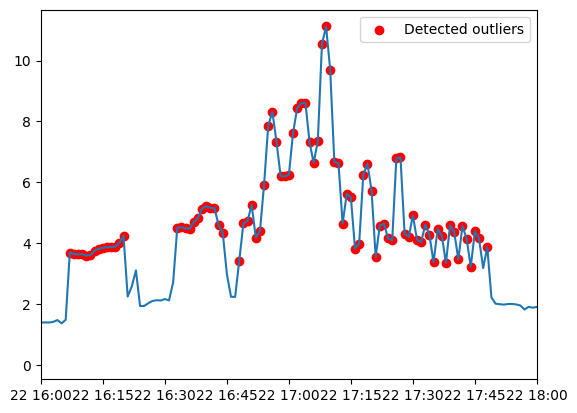

In [ ]:
xlim_start = pd.Timestamp('2009-02-22 16:00:00')
xlim_end = pd.Timestamp('2009-02-22 18:00:00')
plt.plot(df['Datetime'], df[column])
plt.scatter(outliers_z['Datetime'], outliers_z[column], color='red', label='Detected outliers')
plt.xlim(xlim_start, xlim_end)
plt.legend()
plt.show()

###IQR

In [ ]:
column = 'Global_active_power'
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df[column] < lower_bound) | (df[column] > upper_bound)][['Datetime', column]]
outlier_iqr_percent = (len(outliers_iqr) / len(df)) * 100
print(f"Detected {len(outliers_iqr)} outliers ({outlier_iqr_percent:.2f}% of the dataset) in the {column} column using IQR.\n")

Detected 94907 outliers (4.63% of the dataset) in the Global_active_power column using IQR.



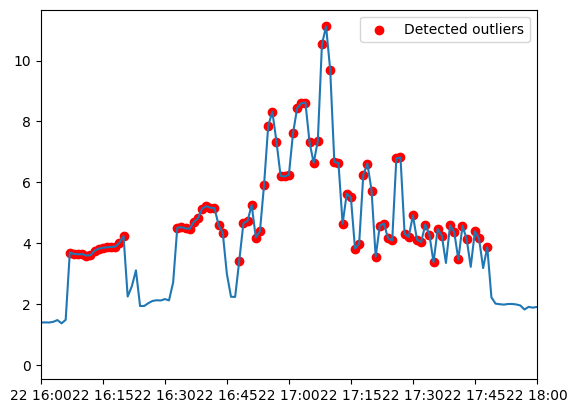

In [ ]:
xlim_start = pd.Timestamp('2009-02-22 16:00:00')
xlim_end = pd.Timestamp('2009-02-22 18:00:00')
plt.plot(df['Datetime'], df[column])
plt.scatter(outliers_iqr['Datetime'], outliers_iqr[column], color='red', label='Detected outliers')
plt.xlim(xlim_start, xlim_end)
plt.legend()
plt.show()

###Local Outlier Factor

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
column = 'Global_active_power'
lof = LocalOutlierFactor(n_neighbors=5)
df['lof'] = lof.fit_predict(df[[column]])
outliers_lof = df[df['lof'] == -1][['Datetime', column]]
outlier_lof_percent = (len(outliers_lof) / len(df)) * 100
print(f"Detected {len(outliers_lof)} outliers ({outlier_lof_percent:.2f}% of the dataset) in the {column} column using LOF.\n")

Detected 432 outliers (0.02% of the dataset) in the Global_active_power column using LOF.



/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


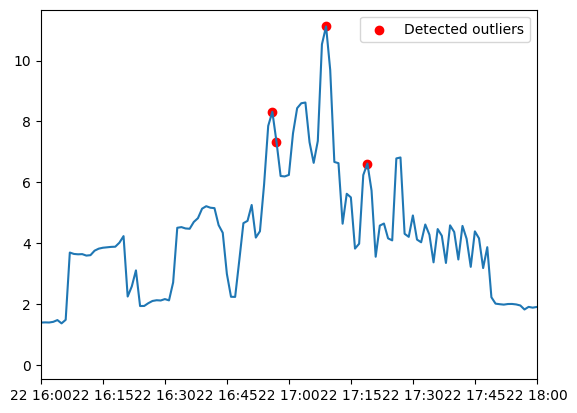

In [ ]:
xlim_start = pd.Timestamp('2009-02-22 16:00:00')
xlim_end = pd.Timestamp('2009-02-22 18:00:00')
plt.plot(df['Datetime'], df[column])
plt.scatter(outliers_lof['Datetime'], outliers_lof[column], color='red', label='Detected outliers')
plt.xlim(xlim_start, xlim_end)
plt.legend()
plt.show()

###Isolation Forests

In [ ]:
from sklearn.ensemble import IsolationForest
column = 'Global_active_power'
clf = IsolationForest(contamination=0.05)
df['forest'] = clf.fit_predict(df[[column]])
outliers_if = df[df['forest'] == -1][['Datetime', column]]
outlier_if_percent = (len(outliers_if) / len(df)) * 100
print(f"Detected {len(outliers_if)} outliers ({outlier_if_percent:.2f}% of the dataset) in the {column} column using IF.\n")

Detected 101874 outliers (4.97% of the dataset) in the Global_active_power column using IF.



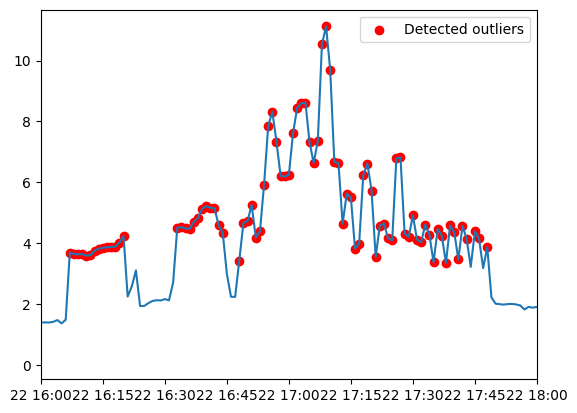

In [ ]:
xlim_start = pd.Timestamp('2009-02-22 16:00:00')
xlim_end = pd.Timestamp('2009-02-22 18:00:00')
plt.plot(df['Datetime'], df[column])
plt.scatter(outliers_if['Datetime'], outliers_if[column], color='red', label='Detected outliers')
plt.xlim(xlim_start, xlim_end)
plt.legend()
plt.show()